In [124]:
# 必要なモジュールをインポート
# from bs4 import BeautifulSoup
# import requests
# import bs4
# import pandas as pd

In [125]:
# テストとして一旦HTMLの中身を取得
# res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
# print(res.status_code)

In [126]:
# BeautifulSoupを使ってみる（練習）
# res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
# soup = BeautifulSoup(res.text, 'html.parser')
# print(soup)

In [127]:
# すべてのpタグを取得してみる(練習)
# res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
# soup = BeautifulSoup(res.text, 'html.parser')
# p_tag = soup.find_all('p')
# p_strings = [x.string for x in p_tag]
# print(p_strings)

In [128]:
# noneになっていたタグの詳細を確認
# print(p_tag[-1])

In [129]:
# タグの親要素から子要素のタグの取得
# res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
# soup = BeautifulSoup(res.text, 'html.parser')
# a_tag = soup.find_all('div')
# p_tag = a_tag[10].find('p')
# # p_strings = [x.string for x in p_tag]
# print(p_tag)

In [130]:
# 指定したclassで取得(練習)
# res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
# soup = BeautifulSoup(res.text, 'html.parser')
# p_tag = soup.find_all('p', class_ = 'temp')
# p_strings = [x.string for x in p_tag]
# print(p_strings)

In [131]:
# 最高気温を取得
# res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
# soup = BeautifulSoup(res.text, 'html.parser')
# p_tag = soup.find_all('p', class_='temp high-temp red')
# high_temp_strings = [x.string for x in p_tag]
# print(p_strings)

In [132]:
# 最低気温の取得
# res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
# soup = BeautifulSoup(res.text, 'html.parser')
# p_tag = soup.find_all('p', class_='temp low-temp blue')
# low_temp_strings = [x.string for x in p_tag]
# print(p_strings)

In [133]:
# 12月の最高気温データを取得

from bs4 import BeautifulSoup
import requests

res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
soup = BeautifulSoup(res.text, 'html.parser')

# 'past-calender-box' クラスを持つdivを取得
div_tag = soup.find('div', class_='past-calender-box')

# 'past-calender-item' クラスを持つ全てのdivタグを取得
calenders_month_12 = div_tag.select('div.past-calender-item:not(.past)')

high_temp_month_12 = []
for item in calenders_month_12:
    # 各カレンダー要素から 'temp high-temp red' クラスを持つpタグを探す
    p_tag = item.find('p', class_='temp high-temp red')
    if p_tag:
        # タグが見つかればその文字列をリストに追加
        high_temp_month_12.append(p_tag.string)

print(high_temp_month_12)



['12.8℃', '14.0℃', '14.9℃', '15.1℃', '10.3℃', '16.1℃', '18.6℃', '17.0℃', '17.5℃', '18.4℃', '17.4℃', '15.2℃', '16.1℃', '15.2℃', '19.9℃', '24.2℃', '18.6℃', '11.9℃', '10.8℃', '12.0℃', '11.8℃', '10.0℃', '9.5℃', '9.5℃', '13.9℃', '13.0℃', '13.1℃', '9.3℃', '12.8℃', '14.8℃', '12.4℃']


In [134]:
# 1月の最高気温を取得
res = requests.get('https://tenki.jp/amp/past/2024/01/weather/3/15/47682/')
soup = BeautifulSoup(res.text, 'html.parser')

# 'past-calender-box' クラスを持つdivを取得
div_tag = soup.find('div', class_='past-calender-box')

# CSSセレクタを使用して 'past-calender-item' クラスのみを持つdivタグを取得
calenders_month_1 = div_tag.select('div.past-calender-item:not(.past)')

high_temp_month_1 = []
for item in calenders_month_1:
    # 各カレンダー要素から 'temp high-temp red' クラスを持つpタグを探す
    p_tag = item.find('p', class_='temp high-temp red')
    if p_tag:
        # タグが見つかればその文字列をリストに追加
        high_temp_month_1.append(p_tag.get_text())

print(high_temp_month_1)


['13.0℃', '9.7℃', '12.0℃', '15.5℃', '13.5℃', '15.7℃', '11.4℃', '10.3℃', '10.8℃', '13.2℃', '7.6℃', '14.1℃', '12.4℃', '11.6℃', '12.2℃']


In [135]:
# 12月と1月の最高気温データを結合
high_temp_list = []

for temp in high_temp_month_12:
    joined_temp = ''.join(temp)
    high_temp_list.append(joined_temp)

for temp in high_temp_month_1:
    joined_temp = ''.join(temp)
    high_temp_list.append(joined_temp)
    
high_temp_list = high_temp_list[12:45]

print(high_temp_list)
print(len(high_temp_list))


['16.1℃', '15.2℃', '19.9℃', '24.2℃', '18.6℃', '11.9℃', '10.8℃', '12.0℃', '11.8℃', '10.0℃', '9.5℃', '9.5℃', '13.9℃', '13.0℃', '13.1℃', '9.3℃', '12.8℃', '14.8℃', '12.4℃', '13.0℃', '9.7℃', '12.0℃', '15.5℃', '13.5℃', '15.7℃', '11.4℃', '10.3℃', '10.8℃', '13.2℃', '7.6℃', '14.1℃', '12.4℃', '11.6℃']
33


In [136]:
# 12月の最低気温データを取得
res = requests.get('https://tenki.jp/amp/past/2023/12/weather/3/15/47682/')
soup = BeautifulSoup(res.text, 'html.parser')

div_tag = soup.find('div', class_='past-calender-box')

# 'past-calender-item' クラスを持つ全てのdivタグを取得
calenders_month_12 = div_tag.select('div.past-calender-item:not(.past)')

low_temp_month_12 = []
for item in calenders_month_12:
    # 各カレンダー要素から 'temp low-temp blue' クラスを持つpタグを探す
    p_tag = item.find('p', class_='temp low-temp blue')
    if p_tag:
        # タグが見つかればその文字列をリストに追加
        low_temp_month_12.append(p_tag.string)

print(low_temp_month_12)

['6.5℃', '4.5℃', '4.2℃', '6.7℃', '5.5℃', '8.3℃', '10.2℃', '8.9℃', '8.3℃', '8.5℃', '10.8℃', '10.5℃', '8.0℃', '7.2℃', '7.9℃', '13.7℃', '11.1℃', '5.1℃', '4.4℃', '6.0℃', '8.0℃', '1.5℃', '1.1℃', '2.7℃', '1.8℃', '4.2℃', '4.8℃', '5.0℃', '3.1℃', '4.8℃', '6.7℃']


In [137]:
# 1月の最低気温を取得
res = requests.get('https://tenki.jp/amp/past/2024/01/weather/3/15/47682/')
soup = BeautifulSoup(res.text, 'html.parser')

# 'past-calender-box' クラスを持つdivを取得
div_tag = soup.find('div', class_='past-calender-box')

# 'past-calender-item' クラスを持つ全てのdivタグを取得
calenders_month_1 = div_tag.select('div.past-calender-item:not(.past)')

low_temp_month_1 = []
for item in calenders_month_1:
    # 各カレンダー要素から 'temp high-temp red' クラスを持つpタグを探す
    p_tag = item.find('p', class_='temp low-temp blue')
    if p_tag:
        # タグが見つかればその文字列をリストに追加
        low_temp_month_1.append(p_tag.string)

print(low_temp_month_1)

['8.9℃', '3.4℃', '3.6℃', '7.9℃', '3.8℃', '4.5℃', '8.4℃', '2.7℃', '2.3℃', '2.6℃', '4.1℃', '1.0℃', '4.1℃', '1.0℃', '7.7℃']


In [138]:
# 最低気温のデータを結合
low_temp_list = []
for temp in low_temp_month_12:
    joined_temp = ''.join(temp)
    low_temp_list.append(joined_temp)

for temp in low_temp_month_1:
    joined_temp = ''.join(temp)
    low_temp_list.append(joined_temp)
    
# 不要なデータを削除
low_temp_list = low_temp_list[12:45]

print(len(low_temp_list))


33


In [139]:
import pandas as pd

df = pd.read_csv('./dspro_last_assignment_local_data.csv')
df
# date = pd.to_datetime(df['日付'])
# print(type(date[0]))

,日付,睡眠時間
0,2023/12/13,6.2
1,2023/12/14,5.3
2,2023/12/15,6.3
3,2023/12/16,10.4
4,2023/12/17,9.1
5,2023/12/18,6.4
6,2023/12/19,4.3
7,2023/12/20,5.5
8,2023/12/21,5.3
9,2023/12/22,9.0


In [140]:
date = pd.to_datetime(df['日付'])
date

0    2023-12-13
1    2023-12-14
2    2023-12-15
3    2023-12-16
4    2023-12-17
5    2023-12-18
6    2023-12-19
7    2023-12-20
8    2023-12-21
9    2023-12-22
10   2023-12-23
11   2023-12-24
12   2023-12-25
13   2023-12-26
14   2023-12-27
15   2023-12-28
16   2023-12-29
17   2023-12-30
18   2023-12-31
19   2024-01-01
20   2024-01-02
21   2024-01-03
22   2024-01-04
23   2024-01-05
24   2024-01-06
25   2024-01-07
26   2024-01-08
27   2024-01-09
28   2024-01-10
29   2024-01-11
30   2024-01-12
31   2024-01-13
32   2024-01-14
Name: 日付, dtype: datetime64[ns]

In [141]:
# 睡眠時間をsleep_timeに格納
sleep_time = df['睡眠時間']
sleep_time

0      6.2
1      5.3
2      6.3
3     10.4
4      9.1
5      6.4
6      4.3
7      5.5
8      5.3
9      9.0
10     8.2
11     8.4
12     9.3
13     7.2
14     7.3
15     7.5
16     8.0
17     6.3
18     5.5
19     7.3
20     7.5
21     7.2
22     5.4
23     7.5
24     8.3
25     9.1
26     7.2
27     6.1
28     8.1
29     5.5
30     7.3
31     4.1
32     9.4
Name: 睡眠時間, dtype: float64

In [142]:
import sqlite3
import pandas as pd
import datetime

# high_temp_lists, low_temp_lists, sleep_time のデータを取得する部分は省略

# pandas を使用して sleep_time データをリストに変換
df = pd.read_csv('./dspro_last_assignment_local_data.csv')
date_list = df['日付']
sleep_time_list = df['睡眠時間']

# データベースへの接続
path = './'
db_name = 'practice.sqlite'
con = sqlite3.connect(path + db_name, detect_types=sqlite3.PARSE_DECLTYPES)
cur = con.cursor()

# テーブルの作成
sql_create_table_practice = '''
CREATE TABLE IF NOT EXISTS practice (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date DATETIME,
    high_temp REAL,
    low_temp REAL,
    sleep_time REAL
);
'''
cur.execute(sql_create_table_practice)

# データを挿入するSQL
sql_insert = "INSERT INTO practice (date, high_temp, low_temp, sleep_time) VALUES (?, ?, ?, ?)"

# 各リストからデータを組み合わせて挿入
for i in range(len(sleep_time_list)):
    # 各リストからデータを取得    
    date = date_list[i]
    # date = datetime.datetime.strptime('2023/12/13', '%Y/%m/%d')
    high_temp = float(high_temp_list[i].replace('℃', '')) if i < len(high_temp_list) else None
    low_temp = float(low_temp_list[i].replace('℃', '')) if i < len(low_temp_list) else None
    sleep_time = sleep_time_list[i]

    # データを挿入
    cur.execute(sql_insert, (date, high_temp, low_temp, sleep_time))

# コミット処理
con.commit()

# DB接続を閉じる
con.close()



In [143]:
import sqlite3

conn = sqlite3.connect('./practice.sqlite')

c = conn.cursor()

date_and_sleep_time_list = [data for data in c.execute('SELECT date, sleep_time FROM practice')]

print(date_and_sleep_time_list)    

conn.close()



[('2023/12/13', 6.2), ('2023/12/14', 5.3), ('2023/12/15', 6.3), ('2023/12/16', 10.4), ('2023/12/17', 9.1), ('2023/12/18', 6.4), ('2023/12/19', 4.3), ('2023/12/20', 5.5), ('2023/12/21', 5.3), ('2023/12/22', 9.0), ('2023/12/23', 8.2), ('2023/12/24', 8.4), ('2023/12/25', 9.3), ('2023/12/26', 7.2), ('2023/12/27', 7.3), ('2023/12/28', 7.5), ('2023/12/29', 8.0), ('2023/12/30', 6.3), ('2023/12/31', 5.5), ('2024/01/01', 7.3), ('2024/01/02', 7.5), ('2024/01/03', 7.2), ('2024/01/04', 5.4), ('2024/01/05', 7.5), ('2024/01/06', 8.3), ('2024/01/07', 9.1), ('2024/01/08', 7.2), ('2024/01/09', 6.1), ('2024/01/10', 8.1), ('2024/01/11', 5.5), ('2024/01/12', 7.3), ('2024/01/13', 4.1), ('2024/01/14', 9.4)]


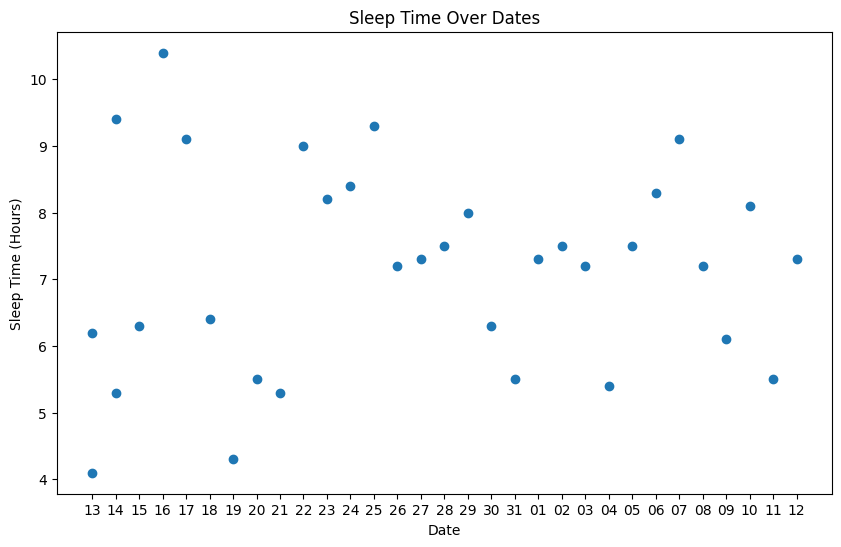

In [146]:
import matplotlib.pyplot as plt

# データベースへの接続
conn = sqlite3.connect('./practice.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_list = [data for data in c.execute('SELECT date, sleep_time FROM practice')]
conn.close()

date_list = []
sleep_time_list = []

for date_str, sleep_time in date_and_sleep_time_list:
    date_str = date_str.replace("2023/12/","")
    date_str = date_str.replace("2024/01/","")
    date_list.append(date_str)  # 日付の文字列をdatetimeオブジェクトに変換
    sleep_time_list.append(sleep_time)

# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))
plt.scatter(date_list, sleep_time_list, marker='o')  # 日付と睡眠時間をプロット
plt.xlabel('Date')
plt.ylabel('Sleep Time (Hours)')
plt.title('Sleep Time Over Dates')
# plt.gcf().autofmt_xdate()  # X軸の日付ラベルを斜めにして読みやすくする
# plt.grid(True)  # グリッドを表示
plt.show()
    

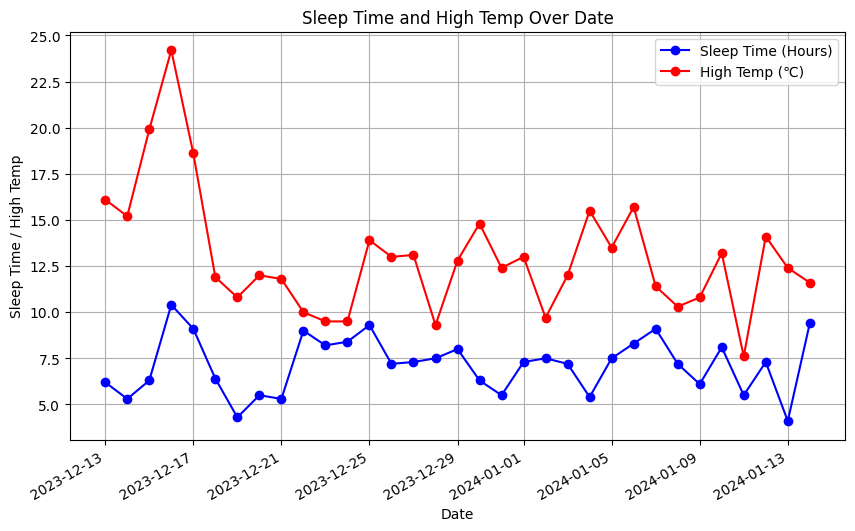

In [147]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# データベースへの接続
conn = sqlite3.connect('./practice.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_and_high_temp_list = [data for data in c.execute('SELECT date, sleep_time, high_temp FROM practice')]
conn.close()

# リストの初期化
date_list = []
sleep_time_list = []
high_temp_list = []

# データのリストへの格納
for date_str, sleep_time, high_temp in date_and_sleep_time_and_high_temp_list:
    # 日付の文字列をdatetimeオブジェクトに変換
    date_obj = datetime.strptime(date_str, '%Y/%m/%d') 
    date_list.append(date_obj)                         
    sleep_time_list.append(sleep_time)
    high_temp_list.append(high_temp)

# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))

# 睡眠時間に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, sleep_time_list, label='Sleep Time (Hours)', color='blue', marker='o')

# 最高気温に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, high_temp_list, label='High Temp (℃)', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Sleep Time / High Temp')
plt.title('Sleep Time and High Temp Over Date')
plt.gcf().autofmt_xdate() 
plt.legend() 
plt.grid(True) 
plt.show() 

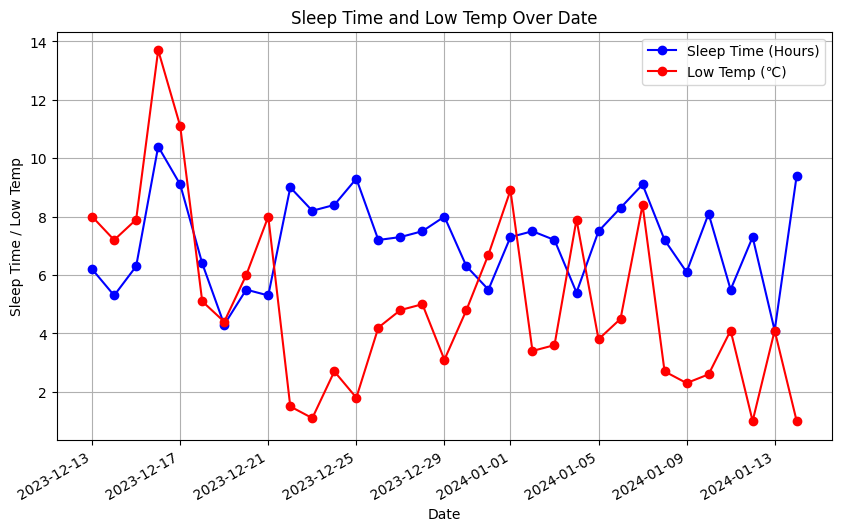

In [149]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# データベースへの接続
conn = sqlite3.connect('./practice.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_and_low_temp_list = [data for data in c.execute('SELECT date, sleep_time, low_temp FROM practice')]
conn.close()

# リストの初期化
date_list = []
sleep_time_list = []
low_temp_list = []

# データのリストへの格納
for date_str, sleep_time, low_temp in date_and_sleep_time_and_low_temp_list:
    # 日付の文字列をdatetimeオブジェクトに変換
    date_obj = datetime.strptime(date_str, '%Y/%m/%d') # <--- この行を追加
    date_list.append(date_obj)                         # <--- この行を追加
    sleep_time_list.append(sleep_time)
    low_temp_list.append(low_temp)


# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))

# 睡眠時間に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, sleep_time_list, label='Sleep Time (Hours)', color='blue', marker='o')

# 最高気温に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, low_temp_list, label='Low Temp (℃)', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Sleep Time / Low Temp')
plt.title('Sleep Time and Low Temp Over Date')
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # X軸の日付フォーマットを設定
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # X軸の目盛りを日単位に設定
plt.gcf().autofmt_xdate() # X軸の日付ラベルを斜めにして読みやすくする
plt.legend() # 凡例を表示
plt.grid(True) # グリッドを表示
plt.show() # グラフを表示